# This is an exploratory data analysis of the FIFA 15-22 dataset.

## The FIFA dataset contains all key attributes, and features of male football players around the world.

## Questions, I wanted to see...

* How do the players look outside of the big 5 leagues?
* Who has a chance in those leagues to turn into useful (80+) players?
* How big is the gap between overall and potential from players?
* Which leagues are producing high potential players?
* Who has grown the most since Fifa 15
* How are highly potential players from Fifa 15 doing currently in Fifa 22?
* Whose market value increased the most from Fifa 15 to Fifa 22?


In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# pip install wordcloud
from wordcloud import WordCloud
import math

# Load, Preview and Prepare the Data

In [241]:
# Load data and preview 

file = "../raw_data/players_15.csv"
df_15 = pd.read_csv(file, low_memory=False)

file = "../raw_data/players_16.csv"
df_16 = pd.read_csv(file, low_memory=False)

file = "../raw_data/players_17.csv"
df_17 = pd.read_csv(file, low_memory=False)

file = "../raw_data/players_18.csv"
df_18 = pd.read_csv(file, low_memory=False)

file = "../raw_data/players_19.csv"
df_19 = pd.read_csv(file, low_memory=False)

file = "../raw_data/players_20.csv"
df_20 = pd.read_csv(file, low_memory=False)

file = "../raw_data/players_21.csv"
df_21 = pd.read_csv(file, low_memory=False)

file = "../raw_data/players_22.csv"
df_22 = pd.read_csv(file, low_memory=False)

dfs = [df_15, df_16, df_17, df_18, df_19, df_20, df_21]

year = 15
columns=['long_name', 'club_logo_url','nation_flag_url','club_flag_url','nation_logo_url','player_face_url','dob','player_url', 'real_face','nation_jersey_number','nation_position']
df_22.drop(columns=columns, inplace=True)

df_22 = df_22.add_suffix('_22')

for frame in dfs:
    frame.drop(columns=columns, inplace=True)
    df_22 = df_22.join(frame, rsuffix=f"_{year}")
    year += 1

df_22

,sofifa_id_22,short_name_22,player_positions_22,overall_22,potential_22,value_eur_22,wage_eur_22,age_22,height_cm_22,weight_kg_22,...,ldm_21,cdm_21,rdm_21,rwb_21,lb_21,lcb_21,cb_21,rcb_21,rb_21,gk_21
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,Song Defu,CDM,47,52,70000.0,1000.0,22,180,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19235,262040,C. Porter,CM,47,59,110000.0,500.0,19,175,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19236,262760,N. Logue,CM,47,55,100000.0,500.0,21,178,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19237,262820,L. Rudden,ST,47,60,110000.0,500.0,19,173,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
# League Names

pd.unique(df_22['league_name'])

array(['French Ligue 1', 'German 1. Bundesliga', 'English Premier League',
       'Spain Primera Division', 'Italian Serie A', 'Holland Eredivisie',
       'USA Major League Soccer', nan, 'Saudi Abdul L. Jameel League',
       'Portuguese Liga ZON SAGRES', 'Campeonato Brasileiro Série A',
       'Turkish Süper Lig', 'Chinese Super League',
       'Russian Premier League', 'Croatian Prva HNL', 'Mexican Liga MX',
       'Ukrainian Premier League', 'Spanish Segunda División',
       'Greek Super League', 'Italian Serie B',
       'Belgian Jupiler Pro League', 'Argentina Primera División',
       'German 2. Bundesliga', 'Japanese J. League Division 1',
       'Swiss Super League', 'Czech Republic Gambrinus Liga',
       'Scottish Premiership', 'English League Championship',
       'French Ligue 2', 'Australian Hyundai A-League',
       'Danish Superliga', 'Chilian Campeonato Nacional',
       'Austrian Football Bundesliga', 'Paraguayan Primera División',
       'Ecuadorian Serie A', 'Urugu

In [142]:
top_5_leagues = ['Spain Primera Division', 'German 1. Bundesliga', 'French Ligue 1',
       'English Premier League', 'Italian Serie A']

In [182]:
df_22['overall_15'] = df_22['sofifa_id'].map(df_15.set_index('sofifa_id')['overall'])
df_22['potential_15'] = df_22['sofifa_id'].map(df_15.set_index('sofifa_id')['potential'])
df_22['value_eur_15'] = df_22['sofifa_id'].map(df_15.set_index('sofifa_id')['value_eur'])
df_15['overall_22'] = df_15['sofifa_id'].map(df_22.set_index('sofifa_id')['overall'])
df_15['potential_22'] = df_15['sofifa_id'].map(df_22.set_index('sofifa_id')['potential'])
df = pd.DataFrame(data=df_22.drop(columns=['overall', 'potential', 'long_name', 'club_logo_url','nation_flag_url','club_flag_url','nation_logo_url','player_face_url','dob','player_url',
           'real_face','nation_jersey_number','nation_position']))
df['short_name'] = df_22['sofifa_id'].map(df_22.set_index('sofifa_id')['short_name'])
df['overall_15'] = df_22['sofifa_id'].map(df_15.set_index('sofifa_id')['overall'])
df['overall_16'] = df_22['sofifa_id'].map(df_16.set_index('sofifa_id')['overall'])
df['overall_17'] = df_22['sofifa_id'].map(df_17.set_index('sofifa_id')['overall'])
df['overall_18'] = df_22['sofifa_id'].map(df_18.set_index('sofifa_id')['overall'])
df['overall_19'] = df_22['sofifa_id'].map(df_19.set_index('sofifa_id')['overall'])
df['overall_20'] = df_22['sofifa_id'].map(df_20.set_index('sofifa_id')['overall'])
df['overall_21'] = df_22['sofifa_id'].map(df_21.set_index('sofifa_id')['overall'])
df['overall_22'] = df_22['sofifa_id'].map(df_22.set_index('sofifa_id')['overall'])
df['potential_15'] = df_22['sofifa_id'].map(df_15.set_index('sofifa_id')['potential'])
df['potential_16'] = df_22['sofifa_id'].map(df_16.set_index('sofifa_id')['potential'])
df['potential_17'] = df_22['sofifa_id'].map(df_17.set_index('sofifa_id')['potential'])
df['potential_18'] = df_22['sofifa_id'].map(df_18.set_index('sofifa_id')['potential'])
df['potential_19'] = df_22['sofifa_id'].map(df_19.set_index('sofifa_id')['potential'])
df['potential_20'] = df_22['sofifa_id'].map(df_20.set_index('sofifa_id')['potential'])
df['potential_21'] = df_22['sofifa_id'].map(df_21.set_index('sofifa_id')['potential'])
df['potential_22'] = df_22['sofifa_id'].map(df_22.set_index('sofifa_id')['potential'])
df.head()

,sofifa_id,short_name,player_positions,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,...,overall_20,overall_21,overall_22,potential_16,potential_17,potential_18,potential_19,potential_20,potential_21,potential_22
0,158023,L. Messi,"RW, ST, CF",78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,...,94.0,93.0,93,95.0,93.0,93.0,94.0,94.0,93.0,93
1,188545,R. Lewandowski,ST,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,...,89.0,91.0,92,89.0,90.0,91.0,90.0,89.0,91.0,92
2,20801,Cristiano Ronaldo,"ST, LW",45000000.0,270000.0,36,187,83,11.0,Manchester United,...,93.0,92.0,91,93.0,94.0,94.0,94.0,93.0,92.0,91
3,190871,Neymar Jr,"LW, CAM",129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,...,92.0,91.0,91,93.0,95.0,94.0,93.0,92.0,91.0,91
4,192985,K. De Bruyne,"CM, CAM",125500000.0,350000.0,30,181,70,10.0,Manchester City,...,91.0,91.0,91,89.0,91.0,92.0,92.0,91.0,91.0,91


In [218]:
dfs = [df_15, df_16, df_17, df_18, df_19, df_20, df_21]

year = 15
df_22.add_suffix('_22'))

for frame in dfs:
    frame.drop(columns=['long_name', 'club_logo_url','nation_flag_url','club_flag_url','nation_logo_url','player_face_url','dob','player_url', 'real_face','nation_jersey_number','nation_position'], inplace=True)
    df_22 = df_22.join(frame, rsuffix=f"_{year}")
    year += 1
    
    

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)


Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'ldm_21', 'cdm_21', 'rdm_21', 'rwb_21', 'lb_21', 'lcb_21', 'cb_21',
       'rcb_21', 'rb_21', 'gk_21'],
      dtype='object', length=803)

# Player Potential

## Players outside of the top 5 leagues who can grow at least 5 points and reach 80 overall

In [146]:
players_not_in_top5 = df_22[~df_22.league_name.isin(top_5_leagues)]
players_not_in_top5['potential_diff'] = players_not_in_top5['potential'] - players_not_in_top5['overall']
df_15['potential_diff'] = df_15['potential'] - df_15['overall']

/var/folders/qc/dxgm0pdj50d10320bwd2y_gc0000gn/T/ipykernel_47792/1867826446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_not_in_top5['potential_diff'] = players_not_in_top5['potential'] - players_not_in_top5['overall']


In [147]:
best = players_not_in_top5[players_not_in_top5.potential > 80]
best = best[best.potential_diff > 5]
sorted_potential = best.sort_values(by=['potential'], ascending=False)
sorted_potential[['short_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'potential_diff', 'club_name', 'league_name']].head(10)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,potential_diff,club_name,league_name
854,R. Gravenberch,"CM, CDM",78,90,33000000.0,11000.0,19,12,Ajax,Holland Eredivisie
381,Pedro Gonçalves,"RW, CM",81,88,51500000.0,19000.0,23,7,Sporting CP,Portuguese Liga ZON SAGRES
1135,N. Madueke,"RM, ST",77,88,23000000.0,11000.0,19,11,PSV,Holland Eredivisie
662,Antony,RW,79,88,39500000.0,17000.0,21,9,Ajax,Holland Eredivisie
4479,M. Vandevoordt,GK,71,87,4300000.0,3000.0,19,16,KRC Genk,Belgian Jupiler Pro League
1450,A. Hložek,"ST, LM, RM",76,87,16000000.0,500.0,18,11,AC Sparta Praha,Czech Republic Gambrinus Liga
505,Pedro Porro,"RWB, RM",80,87,40500000.0,80000.0,21,7,Sporting CP,Portuguese Liga ZON SAGRES
4516,S. Giménez,"ST, CF, CAM",71,86,4500000.0,29000.0,20,15,Cruz Azul,Mexican Liga MX
5457,Francisco Conceição,RM,70,86,4000000.0,3000.0,18,16,FC Porto,Portuguese Liga ZON SAGRES
3808,Gonçalo Ramos,"CF, ST",72,86,5500000.0,8000.0,20,14,SL Benfica,Portuguese Liga ZON SAGRES


## Players outside of the top 5 leagues who have the biggest chance to grow

In [148]:
all_sorted_potential = players_not_in_top5.sort_values(by=['potential_diff'], ascending=False)
all_sorted_potential[['short_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'potential_diff', 'club_name', 'league_name']].head(10)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,potential_diff,club_name,league_name
18936,C. Brady,GK,51,77,220000.0,500.0,17,26,Chicago Fire Football Club,USA Major League Soccer
19183,F. Emmings,GK,48,73,130000.0,500.0,17,25,Minnesota United FC,USA Major League Soccer
16326,A. Hackford,ST,59,84,700000.0,950.0,17,25,Sheffield United,English League Championship
18828,A. Denholm,RW,52,77,250000.0,500.0,17,25,Heart of Midlothian,Scottish Premiership
19146,O. Cisneros,"CAM, CM, ST",49,74,150000.0,500.0,17,25,Sporting Kansas City,USA Major League Soccer
18943,R. O'Kane,RW,51,75,180000.0,500.0,17,24,Dundalk FC,Rep. Ireland Airtricity League
19162,M. Campagna,"CB, CDM",49,73,140000.0,500.0,17,24,Vancouver Whitecaps FC,USA Major League Soccer
19039,K. Paulsen,CB,50,74,140000.0,500.0,17,24,Viking FK,Norwegian Eliteserien
16303,R. van den Berg,CB,59,83,675000.0,500.0,16,24,PEC Zwolle,Holland Eredivisie
17647,B. Kalkan,"LM, RM",56,80,450000.0,850.0,18,24,Kasimpaşa SK,Turkish Süper Lig


## Leagues outside the top 5 producing players who have 80+ potential

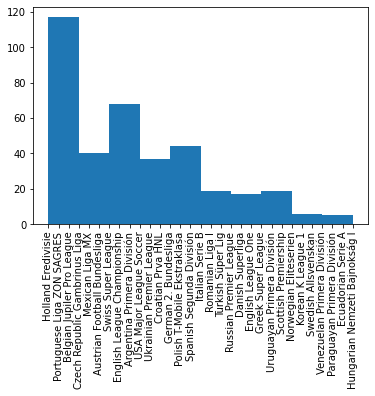

In [149]:
sorted = sorted_potential['league_name'].dropna()
plt.xticks(rotation=90)
plt.hist(sorted);

# Player Growth

### Players that grew the most in overall from 15 - 22

In [151]:
df_22['overall_growth_since_15'] = df_22['overall'] - df_22['overall_15']
sorted_overall_growth = df_22.sort_values(by=['overall_growth_since_15'], ascending=False)
sorted_overall_growth[['short_name', 'player_positions', 'overall', 'overall_15', 'overall_growth_since_15', 'potential', 'potential_15', 'value_eur', 'wage_eur', 'age', 'club_name', 'league_name']].head(10)

,short_name,player_positions,overall,overall_15,overall_growth_since_15,potential,potential_15,value_eur,wage_eur,age,club_name,league_name
354,D. Calvert-Lewin,ST,81,51.0,30.0,85,60.0,37500000.0,90000.0,24,Everton,English Premier League
469,Borja Iglesias,ST,80,50.0,30.0,80,55.0,21500000.0,34000.0,28,Real Betis Balompié,Spain Primera Division
359,K. Laimer,"CDM, CM, RB",81,51.0,30.0,85,57.0,33500000.0,65000.0,24,RB Leipzig,German 1. Bundesliga
1016,M. Holgate,"CB, RB",77,47.0,30.0,81,53.0,13500000.0,56000.0,24,Everton,English Premier League
605,N. Elvedi,CB,79,50.0,29.0,83,62.0,22500000.0,26000.0,24,Borussia Mönchengladbach,German 1. Bundesliga
780,O. Watkins,ST,78,49.0,29.0,83,59.0,21000000.0,67000.0,25,Aston Villa,English Premier League
243,P. Gollini,GK,82,54.0,28.0,87,67.0,35000000.0,48000.0,26,Tottenham Hotspur,English Premier League
127,M. Maignan,GK,84,56.0,28.0,89,74.0,49500000.0,45000.0,25,AC Milan,Italian Serie A
90,S. Milinković-Savić,"CM, CDM, CAM",85,57.0,28.0,87,65.0,66000000.0,100000.0,26,Lazio,Italian Serie A
983,B. Drągowski,GK,77,50.0,27.0,81,68.0,12000000.0,30000.0,23,Fiorentina,Italian Serie A


## Predicting Growth - How the highest potential players (80+) in 15 are rated in 22

In [177]:
best_15 = df_15[df_15.potential > 80]
best_15 = best_15[best_15.potential_diff > 5]

### Sorted by biggest potential difference

In [179]:
sorted_potential_15 = best_15.sort_values(by=['potential_diff'], ascending=False)
sorted_potential_15[['short_name', 'player_positions', 'overall', 'potential', 'potential_22', 'overall_22']].head(10)

,short_name,player_positions,overall,potential,potential_22,overall_22
9914,L. Öztunali,"CDM, CM",62,84,73.0,72.0
11764,N. Barella,CM,60,81,89.0,84.0
10774,M. Tounkara,ST,61,81,NaN,NaN
10004,G. Zelalem,CM,62,82,69.0,63.0
10143,Sergio Buenacasa,ST,62,81,NaN,NaN
10135,Carlos Blanco,CB,62,81,NaN,NaN
10092,S. Kurt,"LM, CAM, CF",62,81,NaN,NaN
9998,Óscar Gil,"CDM, CM, CB",62,81,69.0,64.0
9226,Y. Bnou-Marzuk,ST,63,82,65.0,61.0
7163,F. Bahlouli,"CAM, RM, LM, ST",65,84,NaN,NaN


### Sorted by highest potential


In [162]:
sorted_potential_15 = best_15.sort_values(by=['potential'], ascending=False)
sorted_potential_15[['short_name', 'player_positions', 'overall', 'potential', 'overall_22']].head(10)

,short_name,player_positions,overall,potential,overall_22
31,J. Rodríguez,"CAM, RW",86,92,81.0
44,M. Götze,"CAM, CF, CM, RM",85,91,82.0
99,P. Pogba,"CM, CAM",83,89,87.0
204,R. Varane,CB,81,88,86.0
1904,Y. Tielemans,CM,73,88,84.0
207,A. Laporte,"CB, LB",81,88,86.0
654,J. Iturbe,RW,77,88,NaN
192,S. Feghouli,"RM, RW",81,88,75.0
147,A. Griezmann,"LW, LM",82,88,85.0
142,C. Eriksen,"CAM, LM",82,88,82.0


In [173]:
best_15.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,potential_diff,overall_22
31,198710,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,"CAM, RW",86,92,35000000.0,190000.0,22,...,53+2,59+2,17+2,https://cdn.sofifa.net/players/198/710/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/111109/60.png,https://cdn.sofifa.net/flags/co.png,6,81.0
44,192318,https://sofifa.com/player/192318/mario-gotze/1...,M. Götze,Mario Götze,"CAM, CF, CM, RM",85,91,21000000.0,150000.0,22,...,48+1,55+1,14+1,https://cdn.sofifa.net/players/192/318/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png,6,82.0
99,195864,https://sofifa.com/player/195864/paul-pogba/15...,P. Pogba,Paul Pogba,"CM, CAM",83,89,13500000.0,120000.0,21,...,79+1,78+1,9+1,https://cdn.sofifa.net/players/195/864/15_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png,6,87.0
142,190460,https://sofifa.com/player/190460/christian-eri...,C. Eriksen,Christian Dannemann Eriksen,"CAM, LM",82,88,15000000.0,110000.0,22,...,49+1,59+1,13+1,https://cdn.sofifa.net/players/190/460/15_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1331/60.png,https://cdn.sofifa.net/flags/dk.png,6,82.0
144,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,82,88,11500000.0,110000.0,22,...,37,33,82,https://cdn.sofifa.net/players/192/448/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png,6,90.0


In [174]:
# I wanted to fucking chart these things

# Player Value

### Players that grew the most in value from 15 - 22

In [155]:
df_22['value_growth_since_15'] = df_22['value_eur'] - df_22['value_eur_15']
sorted_value_growth = df_22.sort_values(by=['value_growth_since_15'], ascending=False)
sorted_value_growth[['short_name', 'overall', 'overall_15', 'overall_growth_since_15', 'potential', 'potential_15', 'value_eur', 'value_eur_15', 'value_growth_since_15', 'age', 'club_name', 'league_name']].head(10)


,short_name,overall,overall_15,overall_growth_since_15,potential,potential_15,value_eur,value_eur_15,value_growth_since_15,age,club_name,league_name
9,H. Kane,90,71.0,19.0,90,78.0,129500000.0,1500000.0,128000000.0,27,Tottenham Hotspur,English Premier League
4,K. De Bruyne,91,81.0,10.0,91,86.0,125500000.0,12000000.0,113500000.0,30,Manchester City,English Premier League
5,J. Oblak,91,77.0,14.0,93,82.0,112000000.0,3900000.0,108100000.0,28,Atlético de Madrid,Spain Primera Division
19,J. Kimmich,89,63.0,26.0,90,78.0,108000000.0,250000.0,107750000.0,26,FC Bayern München,German 1. Bundesliga
28,Bruno Fernandes,88,76.0,12.0,89,83.0,107500000.0,4700000.0,102800000.0,26,Manchester United,English Premier League
13,H. Son,89,76.0,13.0,89,81.0,104000000.0,4500000.0,99500000.0,28,Tottenham Hotspur,English Premier League
16,S. Mané,89,74.0,15.0,89,80.0,101000000.0,2900000.0,98100000.0,29,Liverpool,English Premier League
3,Neymar Jr,91,86.0,5.0,91,91.0,129000000.0,31000000.0,98000000.0,29,Paris Saint-Germain,French Ligue 1
10,N. Kanté,90,72.0,18.0,90,76.0,100000000.0,2400000.0,97600000.0,30,Chelsea,English Premier League
27,R. Sterling,88,80.0,8.0,89,86.0,107500000.0,10000000.0,97500000.0,26,Manchester City,English Premier League


# Conclusion


## From the analysis, we can conclude that;

* The Dutch and Portugues leagues are producing the best talent outside of top 5
* DCL improved the most (with 2 others) since Fifa 15
* The players who improved the most were players who were just added to the game in 15 and now currently playing close to full potential
* The players who increased in value the most were the ones in their early 20s, late teens, now in the prime of their careers.
* The majority of players who had the most room for potential in 15, haven't really amounted to much in 22